## Load Libraries

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Model

In [3]:
model = hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/2')

## Unzip Images

In [4]:
#!unzip /content/Imgs.zip -d /content/Imgs

## Visualize

In [5]:
def plot(imgs):
    fig,ax = plt.subplots(1,len(imgs),figsize=(6,6))
    for idx,img in enumerate(imgs):
        plt.grid(False)
        ax[idx].imshow(np.squeeze(img,axis=0))
    plt.show()

## Preprocess Image

In [6]:
def load_image(img_path):
    img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img_path,target_size=(256,256)))
    img = img.astype('float32')
    img = img/255.0
    img_ = np.expand_dims(img,axis=0)
    print(img_.shape)
    return img_


## Load Images

In [7]:
content_img = load_image('./Imgs/content/golden_gate.jpg')

(1, 256, 256, 3)


In [8]:
style_img = load_image('./Imgs/style/the_scream.jpg')

(1, 256, 256, 3)


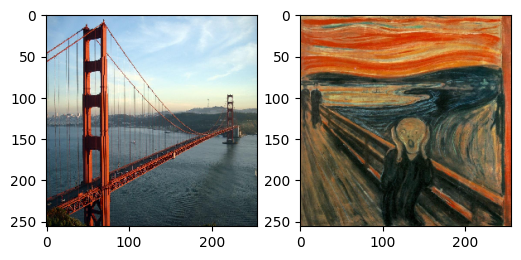

In [9]:
plot([content_img,style_img])

## Apply

In [10]:
styled_img = model(tf.constant(content_img),tf.constant(style_img))

In [11]:
styled_img[0].shape

TensorShape([1, 256, 256, 3])

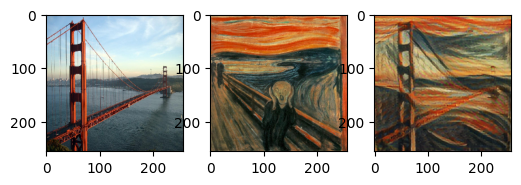

In [12]:
plot([content_img,style_img,styled_img[0]])